In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [111]:
df = pd.read_csv("../data/exams.csv")
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86


In [4]:
df.shape

(1000, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
df.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,67.810000,70.382000,69.140000
std,15.250196,14.107413,15.025917
min,15.000000,25.000000,15.000000
25%,58.000000,61.000000,59.000000
50%,68.000000,70.500000,70.000000
75%,79.250000,80.000000,80.000000
max,100.000000,100.000000,100.000000


In [15]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [26]:
df[['gender']].value_counts()

gender
male      508
female    492
dtype: int64

In [44]:
tmp_df = df[df['math score'] > 80]
tmp_df[['race/ethnicity']].value_counts()

race/ethnicity
group E           70
group D           66
group C           47
group B           34
group A           10
dtype: int64

In [28]:
df[['parental level of education']].value_counts()

parental level of education
some college                   224
high school                    215
associate's degree             204
some high school               177
bachelor's degree              105
master's degree                 75
dtype: int64

In [29]:
df[['test preparation course']].value_counts()

test preparation course
none                       656
completed                  344
dtype: int64

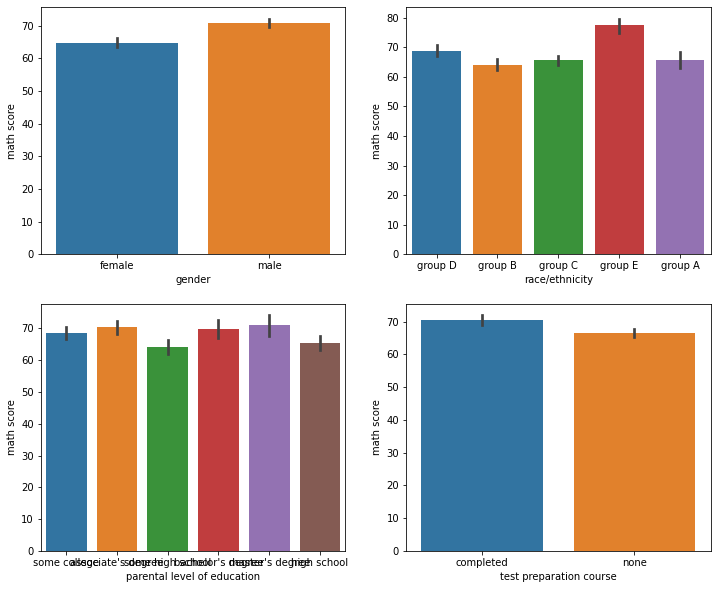

In [32]:
fig = plt.figure(figsize=(12,10))
ax1 = fig.add_subplot(2,2,1)
ax1 = sns.barplot(x='gender', y='math score', data=df)
ax2 = fig.add_subplot(2,2,2)
ax2 = sns.barplot(x='race/ethnicity', y='math score', data=df)
ax3 = fig.add_subplot(2,2,3)
ax3 = sns.barplot(x='parental level of education', y='math score', data=df)
ax4 = fig.add_subplot(2,2,4)
ax4 = sns.barplot(x='test preparation course', y='math score', data=df)

<AxesSubplot:xlabel='math score', ylabel='reading score'>

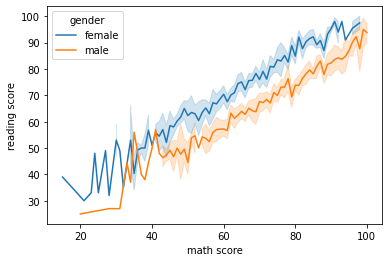

In [36]:
sns.lineplot(x='math score', y='reading score', hue='gender', data=df)

<AxesSubplot:xlabel='reading score', ylabel='writing score'>

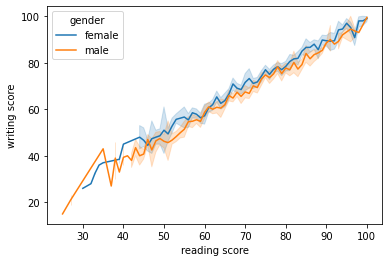

In [39]:
sns.lineplot(x='reading score', y='writing score', hue='gender', data=df)

In [52]:
new_df = pd.DataFrame(tmp_df['race/ethnicity'].value_counts()/len(tmp_df))
new_df.reset_index(inplace=True)
new_df

,index,race/ethnicity
0,group E,0.308370
1,group D,0.290749
2,group C,0.207048
3,group B,0.149780
4,group A,0.044053


([<matplotlib.patches.Wedge at 0x7fc7442269d0>,
 [Text(0.6229422775672459, 0.9066106765416634, 'group E'),
  Text(-1.053869298777681, 0.3152134215001628, 'group D'),
  Text(-0.3224983951790742, -1.0516628666578096, 'group C'),
  Text(0.8068500034022519, -0.7476583925896816, 'group B'),
  Text(1.0894823892733472, -0.15175020086721208, 'group A')],
 [Text(0.33978669685486135, 0.49451491447727086, '30.84%'),
  Text(-0.5748377993332804, 0.17193459354554333, '29.07%'),
  Text(-0.17590821555222227, -0.5736342909042598, '20.70%'),
  Text(0.4401000018557737, -0.4078136686852808, '14.98%'),
  Text(0.5942631214218256, -0.08277283683666112, '4.41%')])

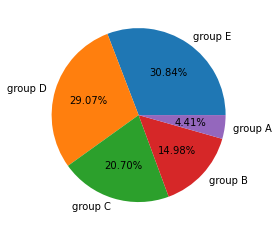

In [53]:
plt.pie(x=list(new_df['race/ethnicity']), labels=new_df['index'],
       autopct='%.2f%%')

In [56]:
new_df = pd.DataFrame(tmp_df['parental level of education'].value_counts()/len(tmp_df))
new_df.reset_index(inplace=True)


,index,parental level of education
0,associate's degree,0.255507
1,some college,0.224670
2,high school,0.176211
3,some high school,0.132159
4,bachelor's degree,0.118943
5,master's degree,0.092511


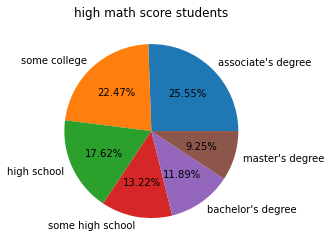

In [121]:
plt.pie(x=list(new_df['parental level of education']), labels=new_df['index'], autopct='%.2f%%')
plt.title('high math score students')
plt.show()

In [85]:
tmp_df = df[(df['writing score']>=90)&(df['math score']>=90) & (df['reading score']>=90)]

In [86]:
tmp_df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
81,male,group D,master's degree,free/reduced,completed,91,93,95
85,male,group D,master's degree,standard,none,100,97,91
95,female,group C,associate's degree,standard,completed,91,96,97
115,female,group E,bachelor's degree,standard,none,98,95,100
156,female,group B,associate's degree,standard,completed,91,99,100
185,female,group D,master's degree,free/reduced,none,93,98,94
292,female,group E,associate's degree,standard,none,96,93,100
312,female,group D,high school,standard,completed,92,95,93
323,female,group D,some high school,standard,completed,94,91,98
373,male,group E,high school,standard,none,96,94,93


In [100]:
new_df1 = pd.DataFrame(tmp_df['gender'].value_counts()/len(tmp_df))
new_df2 = pd.DataFrame(tmp_df['race/ethnicity'].value_counts()/len(tmp_df))
new_df3 = pd.DataFrame(tmp_df['parental level of education'].value_counts()/len(tmp_df))
new_df4 = pd.DataFrame(tmp_df['lunch'].value_counts()/len(tmp_df))

new_df1.reset_index(inplace=True)
new_df2.reset_index(inplace=True)
new_df3.reset_index(inplace=True)
new_df4.reset_index(inplace=True)

In [101]:
new_df1

,index,gender
0,female,0.533333
1,male,0.466667


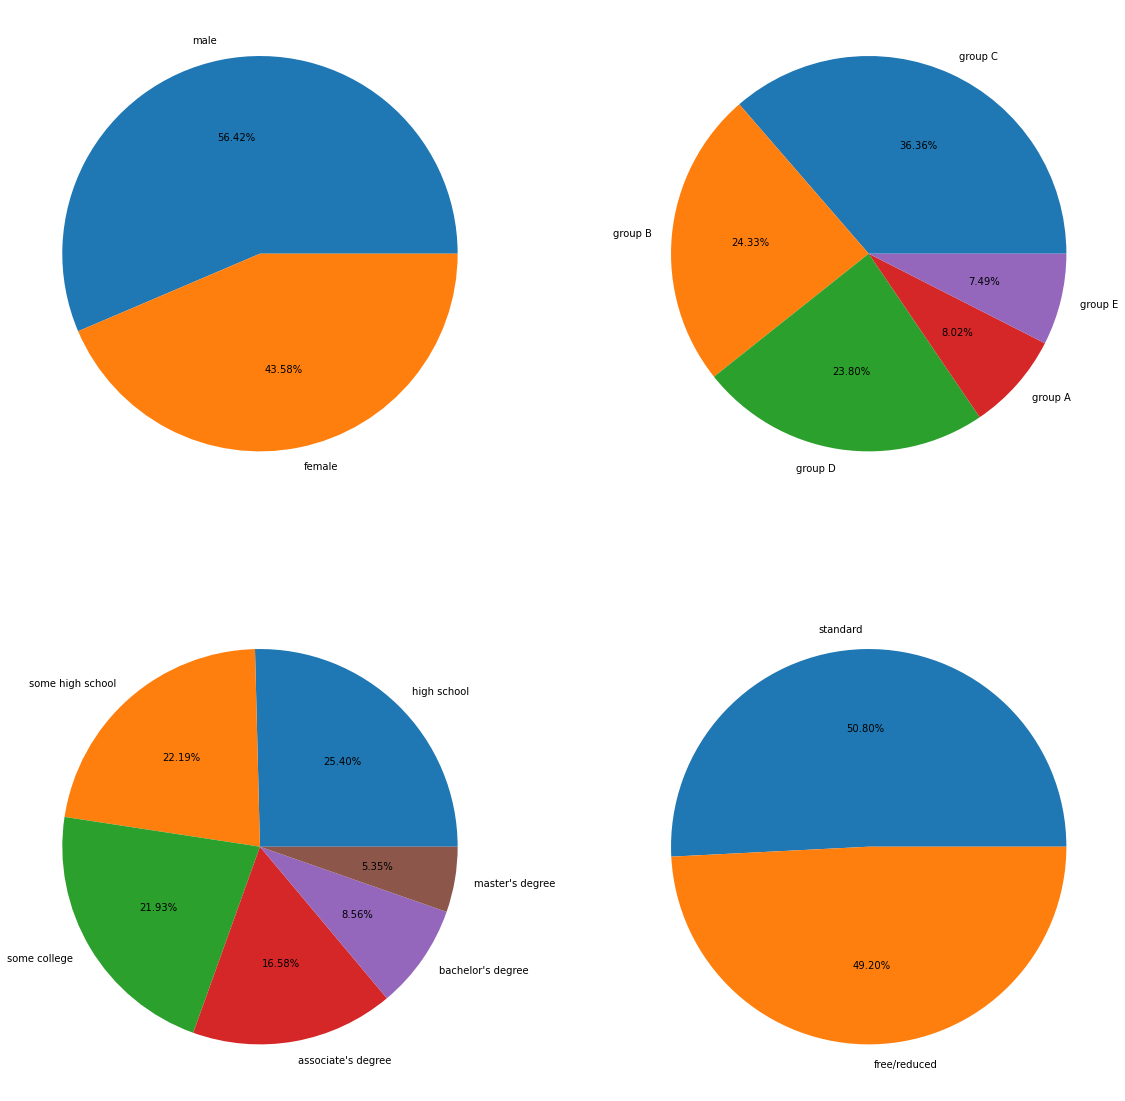

In [124]:
plt.rcParams['axes.facecolor'] = 'yellow'
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(2,2,1)
ax1 = plt.pie(x=list(new_df1['gender']), labels=new_df1['index'], autopct='%.2f%%')
ax2 = fig.add_subplot(2,2,2)
ax2 = plt.pie(x=list(new_df2['race/ethnicity']), labels=new_df2['index'], autopct='%.2f%%')
ax3 = fig.add_subplot(2,2,3)
ax3 = plt.pie(x=list(new_df3['parental level of education']), labels=new_df3['index'], autopct='%.2f%%')
ax4 = fig.add_subplot(2,2,4)
ax4 = plt.pie(x=list(new_df4['lunch']), labels=new_df4['index'], autopct='%.2f%%')
plt.show()

TypeError: pie() got an unexpected keyword argument 'ax'

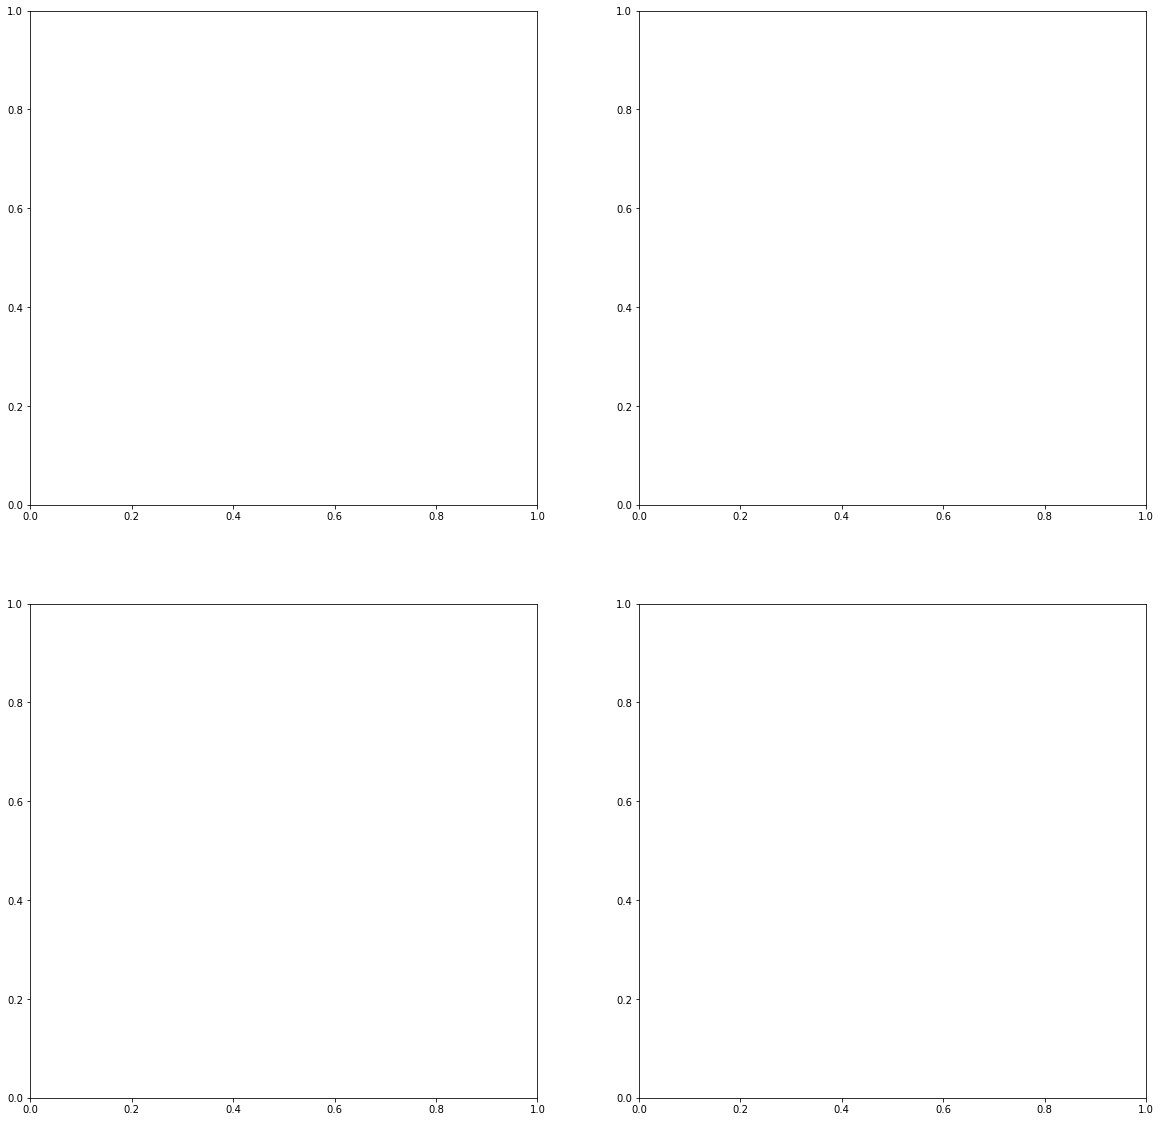

In [119]:
tmp_df = df[(df['math score']<70) & (df['reading score']<70) & (df['writing score']<70)]

new_df1 = pd.DataFrame(tmp_df['gender'].value_counts()/len(tmp_df))
new_df2 = pd.DataFrame(tmp_df['race/ethnicity'].value_counts()/len(tmp_df))
new_df3 = pd.DataFrame(tmp_df['parental level of education'].value_counts()/len(tmp_df))
new_df4 = pd.DataFrame(tmp_df['lunch'].value_counts()/len(tmp_df))

new_df1.reset_index(inplace=True)
new_df2.reset_index(inplace=True)
new_df3.reset_index(inplace=True)
new_df4.reset_index(inplace=True)

fig, axs = plt.subplots(2, 2, figsize=(20,20))
ax1,ax2,ax3,ax4 = axs.flatten()
ax1 = plt.pie(x=list(new_df1['gender']), labels=new_df1['index'], autopct='%.2f%%', ax=ax1)
ax2 = plt.pie(x=list(new_df2['race/ethnicity']), labels=new_df2['index'], autopct='%.2f%%', ax=ax2)
ax3 = plt.pie(x=list(new_df3['parental level of education']), labels=new_df3['index'], autopct='%.2f%%', ax=ax3)
ax4 = plt.pie(x=list(new_df4['lunch']), labels=new_df4['index'], autopct='%.2f%%', ax=ax4)
plt.show()

<AxesSubplot:xlabel='lunch', ylabel='math score'>

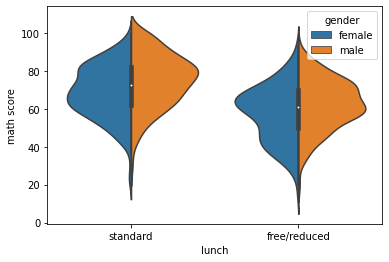

In [116]:
sns.violinplot(y='math score', x='lunch', data=df, hue='gender', split=True)